# Exploratory Data Analysis and Visualization

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [193]:
# Basic Libraries
import json
import statistics

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# !pip install ipynb

---

## 1. Exploring `anime.csv` dataset [2000 to 2021 animes]




In [3]:
anime_df = pd.read_csv('dataset/anime_cleaned.csv')
print("Number of animes:", len(anime_df))
anime_df.head()

Number of animes: 8777


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,...,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
0,95,Turn A Gundam,1999-04-09,2000-04-14,"It is the Correct Century, two millennia after...",7.71,1049,2892,40743,13338,...,1999.0,spring,friday,17:00,2735.0,16661.0,2538.0,1597.0,17292.0,40823.0
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,2000-07-21,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.07,472,4347,17849,6478,...,1999.0,fall,NIL,NIL,814.0,8080.0,638.0,293.0,8048.0,17873.0
2,2471,Doraemon (1979),1979-04-02,2005-03-18,Nobita Nobi is a normal fourth grade student. ...,7.74,976,2553,51255,23826,...,1979.0,spring,NIL,NIL,4637.0,29125.0,4569.0,7816.0,5227.0,51374.0
3,21,One Piece,1999-10-20,airing,"Gol D. Roger was known as the ""Pirate King,"" t...",8.63,66,26,1812581,1020274,...,1999.0,fall,sunday,09:30,1227452.0,0.0,234652.0,161273.0,189153.0,1812530.0
4,2397,Digimon Adventure: Bokura no War Game!,2000-03-04,2000-03-04,This movie takes place after the Adventure ser...,7.77,924,2135,70125,43599,...,2000.0,winter,NIL,NIL,653.0,63538.0,285.0,314.0,5432.0,70222.0


### Features available to explore:

In [4]:
print("Features:")
print("---------")

for header in anime_df.columns:
    print(header)

Features:
---------
id
title
start_date
end_date
synopsis
mean
rank
popularity
num_list_users
num_scoring_users
nsfw
media_type
status
genres
num_episodes
source
average_episode_duration
rating
studios
start_season_year
start_season_season
broadcast_day_of_the_week
broadcast_start_time
statistics_watching
statistics_completed
statistics_on_hold
statistics_dropped
statistics_plan_to_watch
statistics_num_list_users


### Convert `studios` and `genres` features to json for exploration:

In [5]:
from ipynb.fs.full.data_cleaning_preprocessing import json_studios, json_genres;
print("json_studios(), json_genres() imported from data_cleaning_preprocessing.ipynb")

Missing values in dataframe:
id                             0
title                          0
main_picture                   0
start_date                     0
end_date                     876
synopsis                     128
mean                         116
rank                           0
popularity                     0
num_list_users                 0
num_scoring_users              0
nsfw                           0
created_at                     0
updated_at                     0
media_type                     0
status                         0
genres                         8
num_episodes                   0
start_season                   0
broadcast                   5372
source                       901
average_episode_duration       0
rating                        61
background                  7067
studios                        0
statistics                     0
dtype: int64
data shape:  (8777, 26)


C:\Users\Toh Jing Qiang\Desktop\Jing Qiang Programming Projects\NTU Programming\SC1015\SC1015-Project\Anime\data_cleaning_preprocessing.ipynb:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "    <tr>\n",
C:\Users\Toh Jing Qiang\Desktop\Jing Qiang Programming Projects\NTU Programming\SC1015\SC1015-Project\Anime\data_cleaning_preprocessing.ipynb:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "      <th>0</th>\n",
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

json_studios(), json_genres() imported from data_cleaning_preprocessing.ipynb


In [6]:
# convert to json
anime_df = json_studios(anime_df)
anime_df = json_genres(anime_df)

## 1. Explore `genres` feature

In [7]:
from collections import defaultdict

In [8]:
genres_dict = defaultdict(int)

# getting the genres count from 2000 to 2021
for anime in anime_df['genres']:
    for genre in anime:
        genres_dict[genre['name']] += 1
               
# printing out the genre counts
for genre, count in genres_dict.items():
    print(f'{genre}: {count}')

Action: 2744
Adventure: 2278
Drama: 1620
Mecha: 623
Military: 381
Romance: 1125
Sci-Fi: 1458
Space: 230
Comedy: 4571
Fantasy: 2311
Kids: 1253
Shounen: 2036
Super Power: 606
Police: 236
Slice of Life: 1377
School: 1197
Shoujo: 637
Ecchi: 334
Seinen: 626
Mystery: 642
Demons: 351
Horror: 191
Supernatural: 1075
Psychological: 255
Parody: 339
Cars: 69
Historical: 583
Martial Arts: 295
Samurai: 128
Avant Garde: 74
Vampire: 93
Suspense: 118
Music: 821
Game: 377
Harem: 157
Gourmet: 100
Sports: 465
Boys Love: 41
Girls Love: 39
Award Winning: 3
no_genre: 8
Josei: 70


### 1.1 Plot genre counts

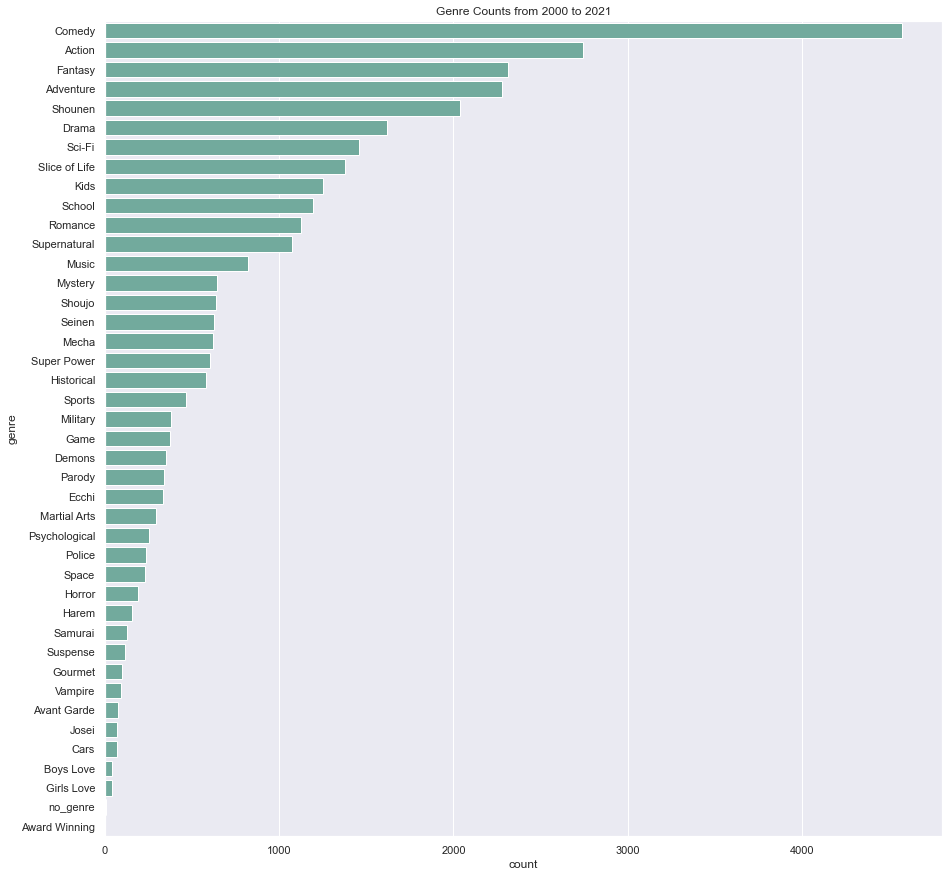

In [9]:
# Plot Genre Counts

# convert dict to dataframe
genre_df = pd.DataFrame(genres_dict.items())

# rename column names
genre_df.rename(columns={0: 'genre', 1: 'count'}, inplace=True)

# Reorder genre dataframe in descending order
genre_df = genre_df.sort_values(['count'], ascending=False).reset_index(drop=True)


# Set the figure size
plt.figure(figsize=(15, 15))

# Make a barplot
sb.barplot(
    x="count", 
    y="genre", 
    data=genre_df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Genre Counts from 2000 to 2021");

- It can be seen that `Comedy` is the genres that most anime have
- The top 5 genres commonly seen  are `Comedy`,  `Action`, `Fantasy`, `Adventure`, and `Shounen`

**Analysis:**
- It seems that animes are generally produced to produce some sort of commedic effect, with a sense of fantasy and adventure filled with action packed scenes.
- Thus, it appears that animes are shows that allow people to have a fun time escaping into another world

---

## 1.2 Let's explore those with no genres:

In [10]:
no_genre_df = anime_df[0:0]

# extracting animes with no genres into a dataframe
for row in range(0, len(anime_df)):
    if anime_df['genres'][row][0]['name'] == 'no_genre':
        no_genre_df = no_genre_df.append(pd.DataFrame(anime_df.iloc[row]).transpose(), ignore_index=True)

print('-> Number of animes with no genres:', len(no_genre_df))

no_genre_df

-> Number of animes with no genres: 8


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
0,22239,Mahou no Yousei Persia Pilot,2003-05-23,2003-05-23,Unaired pilot special of Mahou no Yousei Persi...,5.59,10328,13823,417,120,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,184,pg,"[{'id': 1, 'name': 'Studio Pierrot'}]",2003.0,spring,NIL,NIL,14.0,196.0,9.0,40.0,157.0,416.0
1,6199,Mai-Otome Zwei Special,2008-03-04,2008-03-04,Ribbon-chan wants to become an Otome.\n\n(Sour...,6.64,5472,8329,3369,1297,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,271,g,"[{'id': 14, 'name': 'Sunrise'}]",2008.0,winter,NIL,NIL,68.0,2075.0,59.0,57.0,1107.0,3366.0
2,3805,Kaitou Tenshi Twin Angel,2008-08-08,2008-10-02,Haruka Minazuki and Aoi Kannazuki are freshman...,6.02,8649,6888,5649,1881,white,ova,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",2,game,1800,pg_13,"[{'id': 70, 'name': 'Nomad'}]",2008.0,summer,NIL,NIL,225.0,2492.0,138.0,163.0,2630.0,5648.0
3,6368,Legend of Regios,2009-03-27,2009-05-29,Legend of Regios was originally the English sp...,6.42,6641,5497,9856,2585,white,special,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",3,unknown,506,r,"[{'id': 218, 'name': 'Zexcs'}]",2009.0,winter,NIL,NIL,342.0,4056.0,199.0,193.0,5068.0,9858.0
4,32644,Yaseruyagi,2010-03-28,2010-03-28,"A story about granny, her granddaughter and a ...",5.3,11193,14629,332,159,white,ona,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,37,g,[],2010.0,winter,NIL,NIL,9.0,227.0,0.0,34.0,62.0,332.0
5,10710,Houkago no Pleiades: Manner Movie,2011-06-04,2011-06-04,A manner movie based on the Houkago no Pleiade...,5.35,11046,9257,2349,698,white,movie,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,original,90,pg_13,"[{'id': 6, 'name': 'Gainax'}]",2011.0,spring,NIL,NIL,53.0,1077.0,40.0,63.0,1118.0,2351.0
6,32695,Match Shoujo,2016-02-10,2016-02-10,An animated commercial produced by studio NAZ ...,5.73,9833,11695,899,309,white,ona,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,manga,71,pg,"[{'id': 951, 'name': 'NAZ'}]",2016.0,winter,NIL,NIL,46.0,509.0,9.0,30.0,312.0,906.0
7,38341,Bai Niao,2017-06-13,2017-06-13,"After her mother's death, young kazakh girl Ah...",5.88,9244,13388,484,155,white,movie,finished_airing,"[{'id': -1, 'name': 'no_genre'}]",1,unknown,839,g,[],2017.0,spring,NIL,NIL,18.0,208.0,8.0,28.0,226.0,488.0


In [11]:
# average number of episodes
print('Average number of episodes for animes:', round(anime_df['num_episodes'].mean(), 1))
print('----- \n')

print('Animes with no genres: \n')
# number of episodes for animes with no genres
for anime in range(0, len(no_genre_df)):
    print(f'{no_genre_df["title"][anime]} has {no_genre_df["num_episodes"][anime]} episodes!')
print("")

# average number of episodes for animes with no genres
print('Average number of episodes: ', round(no_genre_df['num_episodes'].mean(), 1))

Average number of episodes for animes: 45.1
----- 

Animes with no genres: 

Mahou no Yousei Persia Pilot has 1 episodes!
Mai-Otome Zwei Special has 1 episodes!
Kaitou Tenshi Twin Angel has 2 episodes!
Legend of Regios has 3 episodes!
Yaseruyagi has 1 episodes!
Houkago no Pleiades: Manner Movie has 1 episodes!
Match Shoujo has 1 episodes!
Bai Niao has 1 episodes!

Average number of episodes:  1.4


In [12]:
print(no_genre_df['broadcast_day_of_the_week'])
print(no_genre_df['broadcast_start_time'])

0    NIL
1    NIL
2    NIL
3    NIL
4    NIL
5    NIL
6    NIL
7    NIL
Name: broadcast_day_of_the_week, dtype: object
0    NIL
1    NIL
2    NIL
3    NIL
4    NIL
5    NIL
6    NIL
7    NIL
Name: broadcast_start_time, dtype: object


**Analysis:**
- It appears that animes with no genres have very low episode count, and are not broadcasted
- This might imply that people rating animes did not have sufficient information to make a proper judgement on the genre of these animes
- These can be considered an `anomaly` since only 8 animes from 2000-2021 do not have any genres

---

## 1.3 Let's explore those with `Award Winning` genre:

In [13]:
award_winning_df = anime_df[0:0]

# extracting animes with no genres into a dataframe
for row in range(0, len(anime_df)):
    for genre in anime_df['genres'][row]:
        if genre['name'] == 'Award Winning':
            award_winning_df = award_winning_df.append(pd.DataFrame(anime_df.iloc[row]).transpose(), ignore_index=True)

print('-> Number of animes with "Award Winning" genre:', len(award_winning_df))

award_winning_df

-> Number of animes with "Award Winning" genre: 3


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
0,199,Sen to Chihiro no Kamikakushi,2001-07-20,2001-07-20,"Stubborn, spoiled, and naïve, 10-year-old Chih...",8.79,32,43,1566400,1096313,white,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 46, 'n...",1,original,7475,pg,"[{'id': 21, 'name': 'Studio Ghibli'}]",2001.0,summer,NIL,NIL,19208.0,1416888.0,3928.0,1773.0,128401.0,1570198.0
1,5365,Tsumiki no Ie,2008-06-10,2008-06-10,In a flooded town where the waters are ever-ri...,8.04,502,1855,87239,49407,white,movie,finished_airing,"[{'id': 46, 'name': 'Award Winning'}, {'id': 8...",1,original,723,g,"[{'id': 234, 'name': 'Oh! Production'}]",2008.0,spring,NIL,NIL,1127.0,61611.0,457.0,288.0,23844.0,87327.0
2,50206,Takano Kousaten,2021-09-17,2021-09-17,"In a certain city, for just a moment in time, ...",6.85,4463,12447,686,369,white,movie,finished_airing,"[{'id': 46, 'name': 'Award Winning'}, {'id': 3...",1,original,390,pg_13,[],2021.0,summer,NIL,NIL,31.0,506.0,2.0,10.0,161.0,710.0


In [14]:
award_winning_df.describe()

,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
count,3,3,3,3,3,3.00,3,3,3,3,3,3,3,3,3,3,3,3,3,3.0,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0
unique,3,3,3,3,3,3.00,3,3,3,3,1,1,1,3,1,1,3,3,3,3.0,2,1,1,3.0,3.0,3.0,3.0,3.0,3.0
top,5365,Sen to Chihiro no Kamikakushi,2021-09-17,2021-09-17,"Stubborn, spoiled, and naïve, 10-year-old Chih...",8.79,32,1855,1566400,1096313,white,movie,finished_airing,"[{'id': 46, 'name': 'Award Winning'}, {'id': 8...",1,original,723,pg,"[{'id': 234, 'name': 'Oh! Production'}]",2008.0,summer,NIL,NIL,19208.0,1416888.0,3928.0,288.0,23844.0,710.0
freq,1,1,1,1,1,1.00,1,1,1,1,3,3,3,1,3,3,1,1,1,1.0,2,3,3,1.0,1.0,1.0,1.0,1.0,1.0


**Analysis:**
- From this one, can see that all 3 of the `Award Winning` genre animes have the same `nsfw`, `media_type`, `num_episodes`, `source`, `broadcast_day_of_the_week` and `broadcast_start_time` as seen from the unique count from .describe()
- All 3 are movies with 1 episode, have original source, not broadcasted on TV and has white nsfw

---

## 1.4 Compare `Award Winning` with `no_genre`:


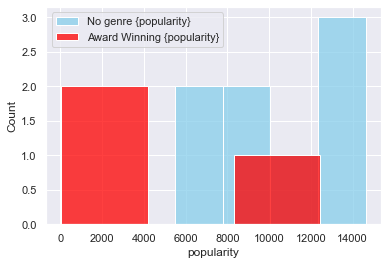

In [15]:
# compare popularity

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="popularity", color="skyblue", label="No genre {popularity}", kde=False)
sb.histplot(data=award_winning_df, x="popularity", color="red", label="Award Winning {popularity}", kde=False)

plt.legend() 
plt.show()

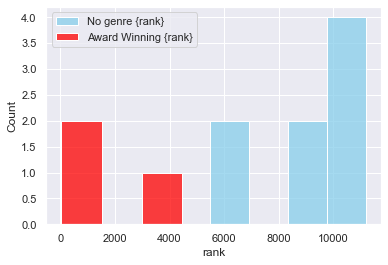

In [16]:
# compare rank

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="rank", color="skyblue", label="No genre {rank}", kde=False)
sb.histplot(data=award_winning_df, x="rank", color="red", label="Award Winning {rank}", kde=False)

plt.legend() 
plt.show()

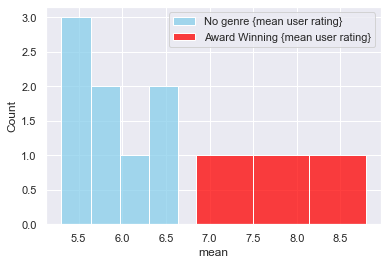

In [17]:
# compare mean user rating: {mean}

sb.set(style="darkgrid")
df = sb.load_dataset("iris")

sb.histplot(data=no_genre_df, x="mean", color="skyblue", label="No genre {mean user rating}", kde=False)
sb.histplot(data=award_winning_df, x="mean", color="red", label="Award Winning {mean user rating}", kde=False)

plt.legend() 
plt.show()

**Analysis:**
- `Award Winning` animes on generally have higher popularity, have better rankings, and are rated higher for all the animes than that of `no_genre` animes
- It seems like what differentiate these 2 categories is that `Award Winning` animes are more popular and higher ranked such that `Award Winning` animes have genres associated with them whereas `no_genre` animes do not.

**Next Step:**
- Let's look at the various `statistics` to compare the viewership statistics:
  - statistics_watching
  - statistics_completed
  - statistics_on_hold
  - statistics_dropped
  - statistics_plan_to_watch
  - **statistics_num_list_users** (equal to sum of the previous statistics)
  
- We shall split the statistics into 2 groups to group the **positive/negative sentiment of the viewership statistics**:
  1. `Positive`
    - statistics_watching + statistics_completed + statistics_plan_to_watch
  2. `Negative`
    - statistics_on_hold + statistics_dropped

In [18]:
# compare statistics_num_list_users
no_genre_total_views = no_genre_df['statistics_num_list_users'].mean()
award_winning_total_views = award_winning_df['statistics_num_list_users'].mean()

print('[Comparing statistics_num_list_users (Average number of viewers)]')
print('-----')
print("'no_genre':      \t", no_genre_total_views)
print("'Award Winning': \t", award_winning_total_views)

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_total_views/no_genre_total_views)*100, 2)}% more views than 'no_genre'")

[Comparing statistics_num_list_users (Average number of viewers)]
-----
'no_genre':      	 2920.625
'Award Winning': 	 552745.0
-----
Percentage greater (using mean values):
'Award Winning' has 18925.57% more views than 'no_genre'


In [19]:
positive_viewership = [
    'statistics_watching',
    'statistics_completed',
    'statistics_plan_to_watch'
]

negative_viewership = [
    'statistics_on_hold',
    'statistics_dropped'
]

# sum row then take mean for all animes
def get_pos_neg_views(df, viewership_types_list):
    total_views = []
    for anime in range(0, len(df)):
        single_view = 0

        for viewership_type in viewership_types_list:
            single_view += df[viewership_type][anime]

        # add this anime single_positive_view to list
        total_views.append(single_view)
        
    return total_views

In [20]:
# compare positive viewership statistics
no_genre_pos_views = round(statistics.mean(get_pos_neg_views(no_genre_df, positive_viewership)), 2)
award_winning_pos_views = round(statistics.mean(get_pos_neg_views(award_winning_df, positive_viewership)), 2)

print('[Comparing positive viewership statistics]')

print('-----')
print("Mean:")
print("'no_genre':      \t", no_genre_pos_views)
print("'Award Winning': \t", award_winning_pos_views)

print('-----')
print(f"Percentage of total views (using mean values):")
print(f"'no_genre':      \t {round(no_genre_pos_views/no_genre_total_views*100, 2)}%")
print(f"'Award Winning': \t {round(award_winning_pos_views/award_winning_total_views*100, 2)}%")

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_pos_views/no_genre_pos_views)*100, 2)}% more positive views than 'no_genre'")

[Comparing positive viewership statistics]
-----
Mean:
'no_genre':      	 2786.88
'Award Winning': 	 550592.33
-----
Percentage of total views (using mean values):
'no_genre':      	 95.42%
'Award Winning': 	 99.61%
-----
Percentage greater (using mean values):
'Award Winning' has 19756.59% more positive views than 'no_genre'


In [21]:
# compare negative viewership statistics
no_genre_neg_views = round(statistics.mean(get_pos_neg_views(no_genre_df, negative_viewership)), 2)
award_winning_neg_views = round(statistics.mean(get_pos_neg_views(award_winning_df, negative_viewership)), 2)

print('[Comparing negative viewership statistics]')

print('-----')
print("Mean:")
print("'no_genre':      \t", no_genre_neg_views)
print("'Award Winning': \t", award_winning_neg_views)

print('-----')
print(f"Percentage of total views (using mean values):")
print(f"'no_genre':      \t {round(no_genre_neg_views/no_genre_total_views*100, 2)}%")
print(f"'Award Winning': \t {round(award_winning_neg_views/award_winning_total_views*100, 2)}%")

print('-----')
print("Percentage greater (using mean values):")
print(f"'Award Winning' has {round((award_winning_neg_views/no_genre_neg_views)*100, 2)}% more negative views than 'no_genre'")

[Comparing negative viewership statistics]
-----
Mean:
'no_genre':      	 133.75
'Award Winning': 	 2152.67
-----
Percentage of total views (using mean values):
'no_genre':      	 4.58%
'Award Winning': 	 0.39%
-----
Percentage greater (using mean values):
'Award Winning' has 1609.47% more negative views than 'no_genre'


**Analysis:**
- It appears that `Award Winning` animes have more views than `no_genre` by a large amount on average
  - **18925.57% more**
- Additionally, the percentage of positive views is greater for `Award Winning` animes than that of `no_genre` animes
  - **0.39% vs 4.58%**
- Furthermore, the percentage of negative views is lower for `Award Winning` animes than that of `no_genre` animes
  - **99.61% vs 95.42%**
  
- Therefore, more people watch `Award Winning` animes and have positive experience with them compared to `no_genre` animes since the retention is greater for `Award Winning` animes.
- Thus, we can conclude that `Award Winning` animes are definitely more popular and viewed more. Hence, these animes have their associated genres

**Conclusion:**
- **Similarities**: number of episodes, broadcast details, status, and nsfw type
- We can conclude that the **differences** between `Award Winning` animes and `no_genre` animes include the popularity, rank, user ratings, and the viewership statistics. (Even though both type have similar number of episodes, broadcast details, status, and nsfw type

---

## 1.5 Exploring `genres` trend from 2000 to 2021
- We will use `start_season_year` and `genres` from the csv file we have prepared during the preprocessing and cleaning stage

In [90]:
# Import genres timeseries dataframe
genres_time_series_df = pd.read_csv('dataset/genres_timeseries_cleaned.csv')
genres_time_series_df.head()

,Start Season Year,School,Suspense,Mystery,Adventure,Slice of Life,Sports,Martial Arts,Space,Comedy,Ecchi,Historical,Kids,Mecha,Drama,Avant Garde,Cars,Josei,Action,Super Power,Parody,Boys Love,Gourmet,Horror,Samurai,Supernatural,Harem,Music,Psychological,Vampire,Romance,Shounen,Game,Shoujo,Sci-Fi,Military,Girls Love,Seinen,Fantasy,Police,Demons
0,1999.0,3,1,20,127,35,0,0,6,167,0,1,54,22,105,0,0,0,117,93,2,0,0,8,0,6,0,7,14,1,5,103,0,1,38,8,0,6,108,0,6
1,2000.0,14,0,18,144,12,10,4,12,172,6,36,77,37,61,15,10,0,106,4,11,2,1,27,6,50,2,14,9,11,41,88,26,22,76,8,0,6,97,5,32
2,2001.0,34,0,14,110,36,41,8,15,161,8,15,47,41,75,2,3,0,102,14,9,0,0,6,1,28,7,9,4,2,50,95,6,25,88,10,1,10,85,5,4
3,2002.0,40,0,27,149,51,23,25,19,234,16,14,42,54,91,3,4,0,157,31,8,2,2,6,4,40,6,17,11,0,79,111,21,32,127,22,0,20,101,15,8
4,2003.0,18,0,20,148,26,26,6,8,168,14,19,43,49,83,0,8,3,110,17,2,0,0,4,5,37,10,13,8,1,61,110,12,20,126,14,1,13,77,10,19


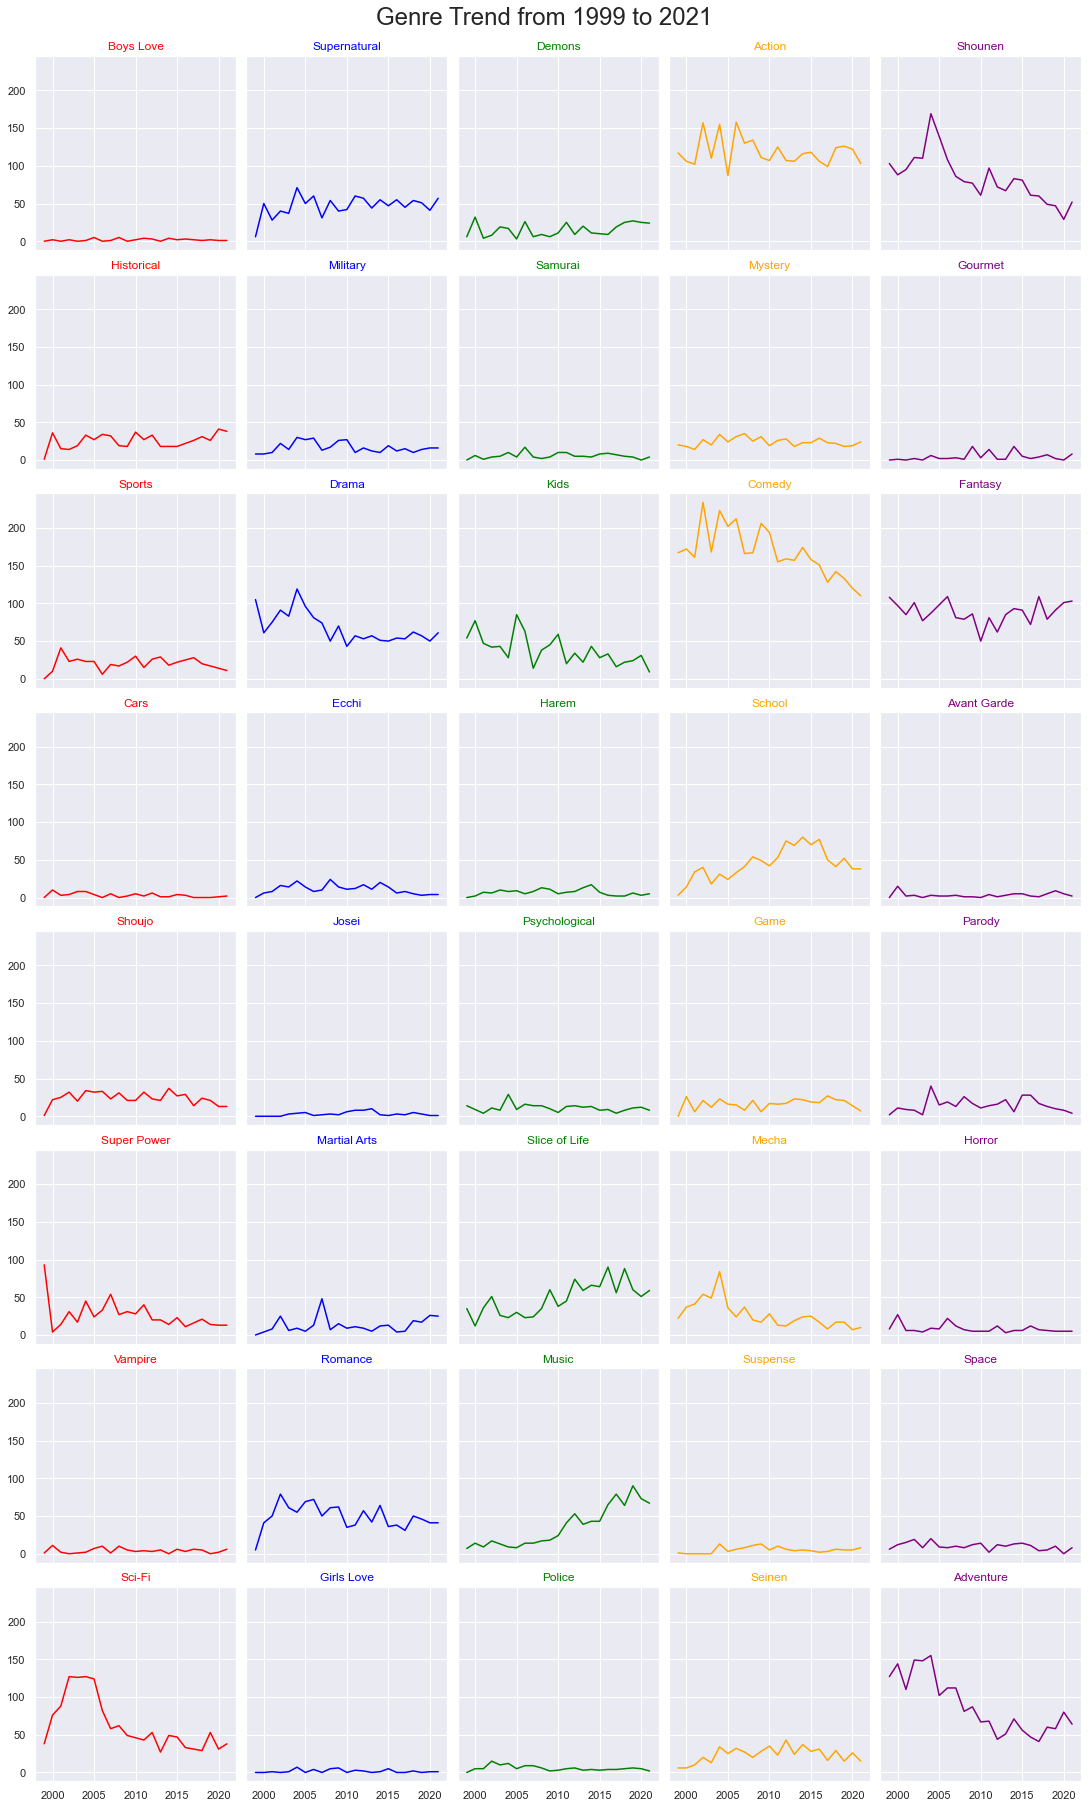

In [91]:
# use seaborn style
sb.set_theme()
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(8, 5, figsize=(15, 25), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle('Genre Trend from 1999 to 2021', fontsize=24)

x_index = 0
y_index = 0

for genre in genres_list:
    # plot line graph
    axs[x_index, y_index].plot('Start Season Year', genre, data=genres_time_series_df, color=colors[y_index])
    axs[x_index, y_index].set_title(f'{genre}', color=colors[y_index])
    
    # subplot ordering
    x_index += 1
    if x_index > 7:
        x_index -= 8
        y_index += 1
        

# show the graph
plt.show()

**Analysis:**
- **Decreasing Trend:**
  - Shounen, Comedy, Kids, Mecha, Sci-Fi, Adventure
- **Increasing Trend:**
  - Slice of Life, Music


- Surprising for `Shounen`, `Comedy`, and `Adventure` to have a decreasing trend since they are among the top 5 genres commonly seen
- `Slice of Life`, and `Music` could possibly become common animes in the future

---

# 2. Exploring 'studios'
- We will use `studios` from anime_df

In [101]:
studios_df = pd.DataFrame(anime_df['studios'])
studios_df.head()

,studios
0,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '..."
1,"[{'id': 8, 'name': 'Artland'}, {'id': 207, 'na..."
2,"[{'id': 247, 'name': 'Shin-Ei Animation'}]"
3,"[{'id': 18, 'name': 'Toei Animation'}]"
4,"[{'id': 18, 'name': 'Toei Animation'}]"


In [112]:
# creating a dictionary to count the frequency of each producer
studios_dict = defaultdict(int)

# getting studio count
for row in range(len(studios_df)):
    for studio in studios_df['studios'][row]:
        studios_dict[studio['name']] += 1

# printing out the studio counts
for studio, count in studios_dict.items():
    print(f'{studio}: {count}')

Sunrise: 423
Nakamura Production: 1
Artland: 45
Magic Bus: 12
Shin-Ei Animation: 294
Toei Animation: 468
Gallop: 178
Nippon Animation: 191
Group TAC: 43
Ajia-Do: 106
Madhouse: 330
TMS Entertainment: 408
Studio Pierrot: 255
Yumeta Company: 23
Milky Cartoon: 12
APPP: 14
Studio Deen: 243
SBS TV Production: 9
PP Project: 2
dwarf: 34
AIC: 54
OLM: 306
Production Reed: 18
Xebec: 161
J.C.Staff: 236
Eiken: 96
Bee Train: 41
Studio Bogey: 6
Studio Hibari: 56
Trans Arts: 29
Actas: 53
Satelight: 110
Production I.G: 255
Gainax: 40
Plum: 6
E&G Films: 10
Tatsunoko Production: 98
Hal Film Maker: 39
Triangle Staff: 1
Bones: 136
Gonzo: 140
Studio Ghibli: 27
Studio Live: 3
Studio Flag: 5
Brain's Base: 80
Vega Entertainment: 10
Radix: 24
Shaft: 109
Phoenix Entertainment: 1
Triple X: 2
Polygon Pictures: 21
Tezuka Productions: 35
Pastel: 2
JCF: 2
M.S.C: 14
Tokyo Kids: 15
Daume: 22
Ashi Production: 3
Dongwoo A&E: 23
Zexcs: 40
Soeishinsha: 2
Studio Comet: 75
Creators Dot Com: 2
Studio 4°C: 39
Studio Kyuuma: 2


## Top 50 Studios

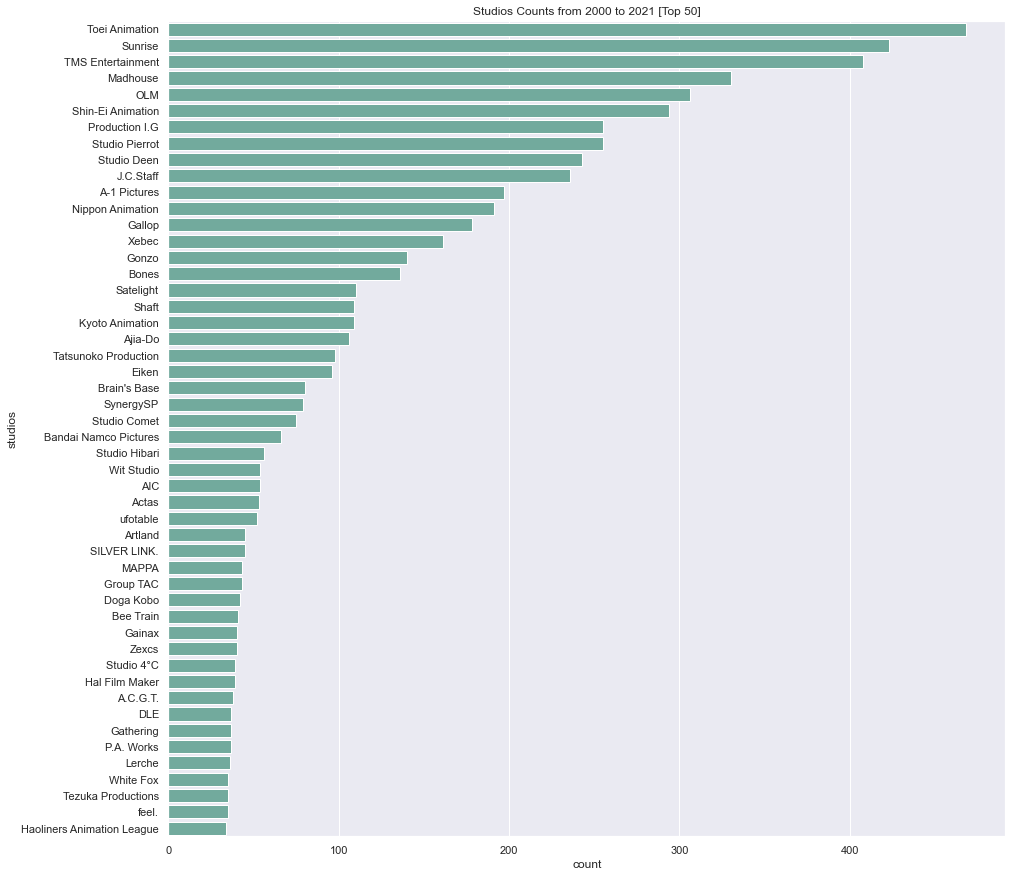

In [122]:
# Ploting Top 50 Studios Counts

# convert dict to dataframe
studios_df = pd.DataFrame(studios_dict.items())

# rename column names
studios_df.rename(columns={0: 'studios', 1: 'count'}, inplace=True)

# Reorder genre dataframe in descending order
studios_df = studios_df.sort_values(['count'], ascending=False).reset_index(drop=True)


# Set the figure size
plt.figure(figsize=(15, 15))

# Make a barplot
sb.barplot(
    x="count", 
    y="studios", 
    data=studios_df.head(50), 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Studios Counts from 2000 to 2021 [Top 50]");

## Top 5 Studios

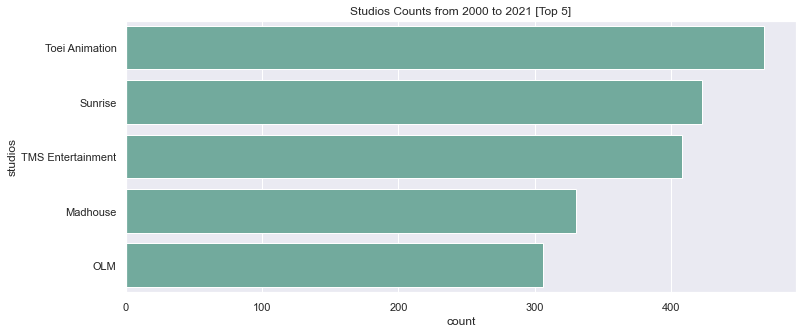

In [130]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Make a barplot
sb.barplot(
    x="count", 
    y="studios", 
    data=studios_df.head(), 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Studios Counts from 2000 to 2021 [Top 5]");

**Analysis:**
- `Toei Animation` is the most common studio in this dataset, followed by `Sunrise`, `TMS Entertainment`, `Madhouse`, and `OLM`.

---

# 3. `source`, `media_type`, `nsfw`, `genre` vs `mean` rating

## 3.1 `source` vs `mean` rating

In [152]:
source_df = pd.DataFrame(anime_df.groupby('source')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
source_df

,source,mean
0,web_novel,8.407143
1,manga,7.475015
2,light_novel,7.467327
3,novel,7.246776
4,web_manga,7.177500
5,mixed_media,6.977692
6,visual_novel,6.945909
7,book,6.782121
8,4_koma_manga,6.778904
9,game,6.755470


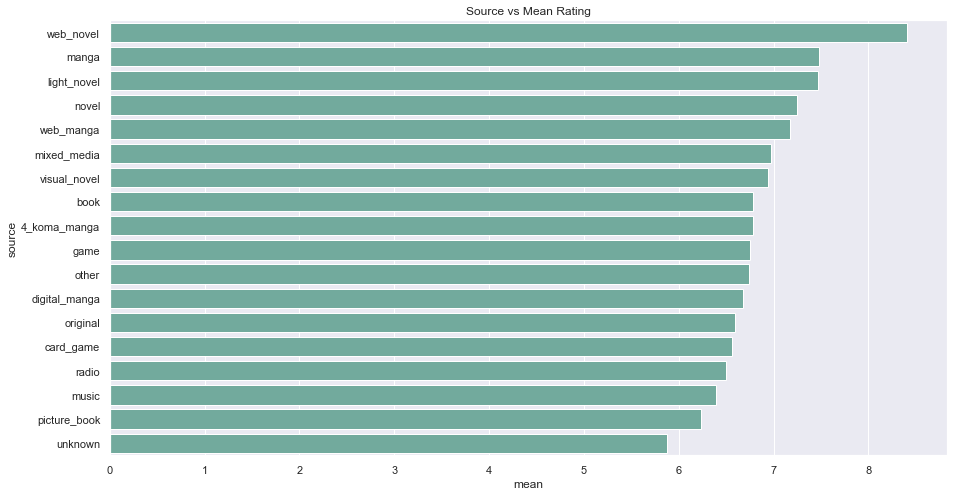

In [161]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot
sb.barplot(
    x="mean", 
    y="source", 
    data=source_df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Source vs Mean Rating");

**Analysis:**
- `Web Novels` is a anime source that is very popular among viewers as these animes have a mean rating of 8.4, which is significantly more than that of other sources
- The top 5 anime sources are `web_novel`, `manga`, `light_novel`, `novel`, and `web_manga`
  - It seems like popular animes generally come from **novels & mangas**

## 3.2 `media_type` vs `mean` rating

In [162]:
media_type_df = pd.DataFrame(anime_df.groupby('media_type')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
media_type_df

,media_type,mean
0,movie,7.105680
1,tv,7.085728
2,ova,6.908363
3,special,6.686939
4,ona,6.648785
5,music,6.204336


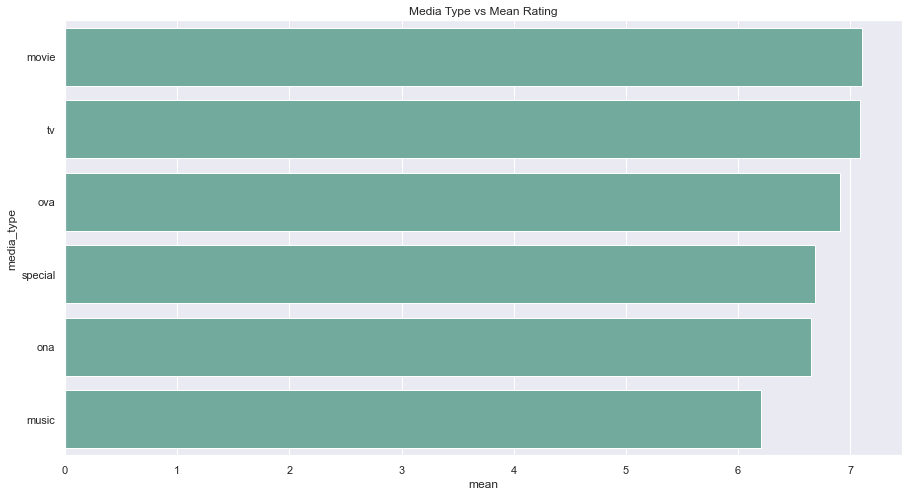

In [164]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot
sb.barplot(
    x="mean", 
    y="media_type", 
    data=media_type_df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Media Type vs Mean Rating");

**Analysis:**
- All media types generally have similar mean rating.
- However, movie, tv, and ova have slightly higher mean rating, while music have the lowest mean rating.
  - This suggests that animes with **storylines** are higher rated compared to music-media-type animes

## 3.2 `nsfw` vs `mean` rating

In [165]:
nsfw_df = pd.DataFrame(anime_df.groupby('nsfw')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
nsfw_df

,nsfw,mean
0,white,6.949968


In [170]:
print(anime_df['nsfw'].unique())

['white']


**Analysis:**
- It seems like this dataset only included 'white' nsfw animes
- Thus, we **cannot compare** the different nsfw types with the mean rating

## 3.2 `genre` vs `mean` rating

In [215]:
# create a dictionary of genre mean ratings
genres_mean_ratings_dict = {}

for row in range(len(anime_df)):
    for genre in anime_df['genres'][row]:
        genre_name = genre['name']
        if genre_name not in genres_mean_ratings_dict:
            genres_mean_ratings_dict[genre_name] = anime_df['mean'][row]
        else:
            genres_mean_ratings_dict[genre_name] = round(
                (genres_mean_ratings_dict[genre_name] + anime_df['mean'][row]) / 2, 2)


In [218]:
# convert to dataframe
genres_mean_ratings_df = pd.DataFrame(genres_mean_ratings_dict.items())

# rename columns
genres_mean_ratings_df.rename(columns={0: "genre", 1: "mean"}, inplace=True)

# sort df in descending order
genres_mean_ratings_df = genres_mean_ratings_df.sort_values(by='mean', ascending=False).reset_index(drop=True)

genres_mean_ratings_df.head()

,genre,mean
0,Police,8.12
1,Ecchi,7.96
2,Award Winning,7.63
3,Seinen,7.55
4,Samurai,7.54


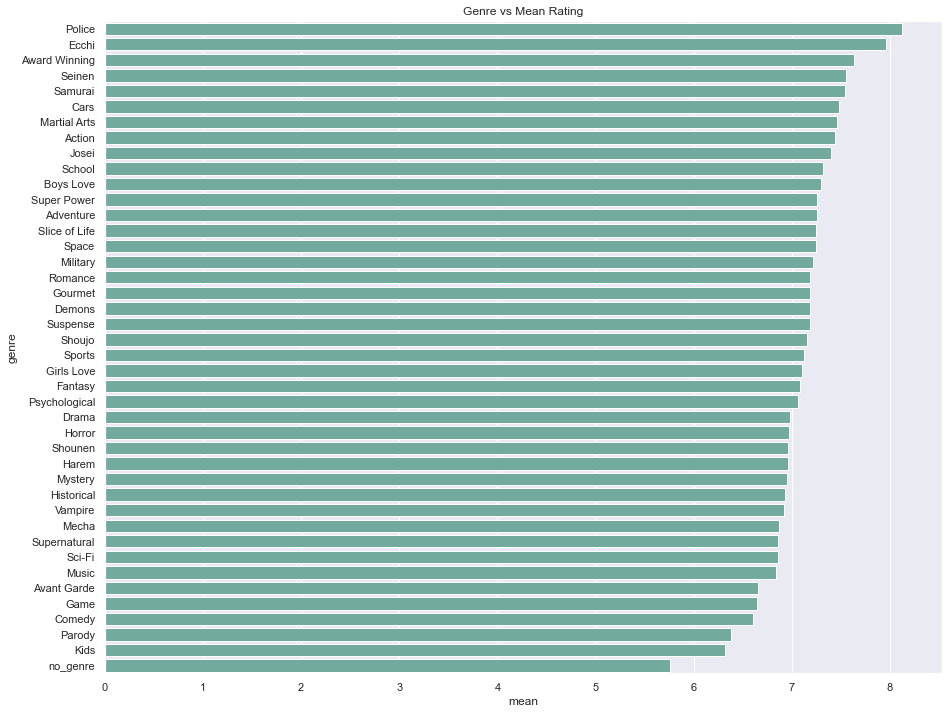

In [221]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Make a barplot
sb.barplot(
    x="mean", 
    y="genre", 
    data=genres_mean_ratings_df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Genre vs Mean Rating");

**Analysis:**
- The top 5 genres with the highest mean rating include `Police`, `Ecchi`, `Award Winning`, `Seinen`, and `Samurai`
- The bottom 5 genres with the lowest mean rating include `no_genre`, `Kids`, `Parody`, `Comedy`, and `Game`


- It is no surprise that `Comedy` has the forth lowest mean rating even though it is among the top 5 most commonly seen genres as it support its decreasing trend in animes with 'Comedy' genre produced yearly
- `Kids` has the 2nd lowest mean rating which supports its decreasing trend in animes with 'Kids' genre produced yearly


- `no_genre` has the lowest mean rating because these animes are so bad that no one rated them

---
**From previous analysis:**
- The top 5 genres commonly seen are Comedy, Action, Fantasy, Adventure, and Shounen
- **Decreasing Trend:**
  - Shounen, Comedy, Kids, Mecha, Sci-Fi, Adventure
- **Increasing Trend:**
  - Slice of Life, Music

## Does genres affect popularity? (What is their relationship?)
## Relationships of mean rating with genres, media_type, nsfw, num_episodes, average_episode_duration, rating, studios

- Create new csv for genres, and studios after splitting json, with anime id as the foreign key
  - genres time series
  - anime watch count time series
  - studios associated with anime
  

In [133]:
anime_df

,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
0,95,Turn A Gundam,1999-04-09,2000-04-14,"It is the Correct Century, two millennia after...",7.71,1049,2892,40743,13338,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,original,1445,pg_13,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '...",1999.0,spring,friday,17:00,2735.0,16661.0,2538.0,1597.0,17292.0,40823.0
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,2000-07-21,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.07,472,4347,17849,6478,white,ova,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",28,novel,1560,r,"[{'id': 8, 'name': 'Artland'}, {'id': 207, 'na...",1999.0,fall,NIL,NIL,814.0,8080.0,638.0,293.0,8048.0,17873.0
2,2471,Doraemon (1979),1979-04-02,2005-03-18,Nobita Nobi is a normal fourth grade student. ...,7.74,976,2553,51255,23826,white,tv,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1787,manga,660,pg,"[{'id': 247, 'name': 'Shin-Ei Animation'}]",1979.0,spring,NIL,NIL,4637.0,29125.0,4569.0,7816.0,5227.0,51374.0
3,21,One Piece,1999-10-20,airing,"Gol D. Roger was known as the ""Pirate King,"" t...",8.63,66,26,1812581,1020274,white,tv,currently_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",0,manga,1440,pg_13,"[{'id': 18, 'name': 'Toei Animation'}]",1999.0,fall,sunday,09:30,1227452.0,0.0,234652.0,161273.0,189153.0,1812530.0
4,2397,Digimon Adventure: Bokura no War Game!,2000-03-04,2000-03-04,This movie takes place after the Adventure ser...,7.77,924,2135,70125,43599,white,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1,original,2460,pg,"[{'id': 18, 'name': 'Toei Animation'}]",2000.0,winter,NIL,NIL,653.0,63538.0,285.0,314.0,5432.0,70222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,44275,Selection Project,2021-10-01,2021-12-24,"Due to a weak heart, Suzune Miyama has remaine...",7.28,2536,3229,33568,10147,white,tv,finished_airing,"[{'id': 19, 'name': 'Music'}]",13,mixed_media,1420,pg_13,"[{'id': 95, 'name': 'Doga Kobo'}]",2021.0,fall,friday,22:00,5247.0,10993.0,1002.0,1988.0,14338.0,33568.0
8773,45489,Aggressive Retsuko (ONA) 4th Season,2021-12-16,2021-12-16,Fourth season of Aggressive Retsuko.,7.30,2406,3299,32202,15146,white,ona,finished_airing,"[{'id': 4, 'name': 'Comedy'}, {'id': 36, 'name...",10,other,1113,pg_13,[],2021.0,fall,NIL,NIL,1521.0,19932.0,193.0,108.0,10832.0,32586.0
8774,48505,Hanyou no Yashahime: Sengoku Otogizoushi - Ni ...,2021-10-02,2022-03-26,Second season of Hanyou no Yashahime: Sengoku ...,7.15,3191,3377,30517,4149,white,tv,currently_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",24,original,1449,pg_13,"[{'id': 14, 'name': 'Sunrise'}]",2021.0,fall,saturday,17:30,12282.0,1.0,695.0,679.0,16860.0,30517.0
8775,48567,Visual Prison,2021-10-09,2021-12-25,Vampires have existed for centuries and live u...,6.65,5420,3340,31146,5138,white,tv,finished_airing,"[{'id': 19, 'name': 'Music'}, {'id': 37, 'name...",12,original,1452,pg_13,"[{'id': 56, 'name': 'A-1 Pictures'}]",2021.0,fall,saturday,00:00,4043.0,5906.0,701.0,3286.0,17209.0,31145.0
